# Things you will find in this notebook:
* A step-by-step guide on how to approach any competition on Kaggle.
* Exploratory Data Analysis on the famous Titanic Dataset.
* Feature Selection and Feature Engineering for better results.
* What are Ensembling Machine Learning Techniques and how we can use them optimally on any dataset. 
* Comparing different ensembling techniques on the basis of score and optimizing them.

#### The objective of this notebook is to introduce the concept of ensemble learning and understand the algorithms which use this technique. To cement your understanding of this diverse topic, I will explain the advanced algorithms in Python using a hands-on case study on the titanic dataset.

> Prerequisites: 
The notebook assumes that you have a basic understanding of the following
concepts. If you don’t, I encourage you to go through the links I have provided:<br> <br>
EDA, Missing Values, Outlier Treatment, etc.
To understand the topics, you can go through
this article: [Ultimate guide for Data Exploration in Python using NumPy, Matplotlib and
Pandas.](https://www.analyticsvidhya.com/blog/2015/04/comprehensive-guide-data-exploration-sas-using-python-numpy-scipy-matplotlib-pandas/)<br><br>
A basic understanding of Machine Learning algorithms. I would recommend going through
this article to familiarize yourself with these concepts: [Commonly used Machine Learning
Algorithms (with Python and R Codes)](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)<br><br>
> For tuning the hyper parameters of decision tree and other based models used, refer [here](https://www.kaggle.com/tug004/surviving-titanic-the-right-way).<br><br>
    
1) Simple:
In this section, we will look at a few simple but powerful techniques, namely:
1. Max Voting
2. Averaging
3. Weighted Averaging<br><br>

2) Advanced<br>
In this section, we will look at advanced techniques, namely:
1.  Stacking
1.  Blending
1.  The other advanced EL techniques are Bagging and Boosting.<br><br>

3) EL models based on Bagging and Boosting:
1. Bagging<br>
a) Bagging Meta Estimator
b) Random Forest
2. Boosting algorithms:<br>
a) GBM
b) XGBoost
c) AdaBoost
d) Light GBM
e) CatBoost

> Do upvote if you find this notebook useful!


## Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score,auc,roc_curve
import re as re
import statistics

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier,StackingClassifier, BaggingClassifier, AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings 
warnings.filterwarnings('ignore')


In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv',)
combined = [train_data,test_data]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()
print('-' * 50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

### Comparing survival rate with gender.

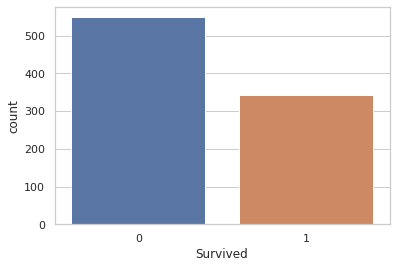

In [4]:
sns.set(style="whitegrid")
sns.countplot(train_data['Survived'],data = train_data)
plt.show()

In [5]:
print('Percentage of null values in each column of train data:\n')
(train_data.isnull().sum() / train_data.shape[0]) * 100

Percentage of null values in each column of train data:



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
print('Percentage of null values in each column of test data:\n')
(test_data.isnull().sum() / test_data.shape[0]) * 100

Percentage of null values in each column of test data:



PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [7]:
train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meo, Mr. Alfonzo",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


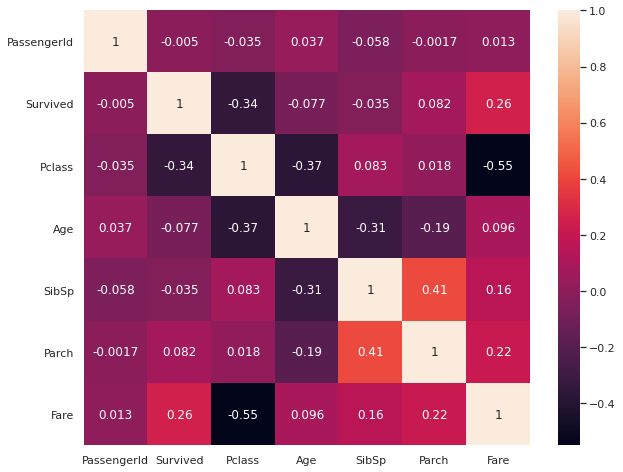

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(train_data.corr(),annot=True,cbar = True)
plt.show()

> Dropping passengerid as it does not affect survived class. <br>
> Dropping cabin as it has lots of null values.

In [9]:
train_data.drop(['PassengerId','Cabin'],inplace=True,axis = 1)
test_data.drop(['PassengerId','Cabin'],inplace=True,axis = 1)

In [10]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [11]:
train_data.loc[0,train_data.dtypes == object]

Name        Braund, Mr. Owen Harris
Sex                            male
Ticket                    A/5 21171
Embarked                          S
Name: 0, dtype: object

> Finding co-relations between target variable and name, sex, ticket and embarked columns.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


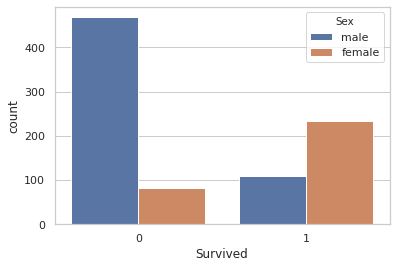

In [12]:
print(train_data.groupby(['Sex','Survived'])['Survived'].count())

sns.set(style="whitegrid")
sns.countplot(train_data['Survived'],hue = 'Sex',data = train_data)
plt.show()

In [13]:
train_data.drop(['Ticket'],axis = 1,inplace = True)
test_data.drop(['Ticket'],axis = 1,inplace = True)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


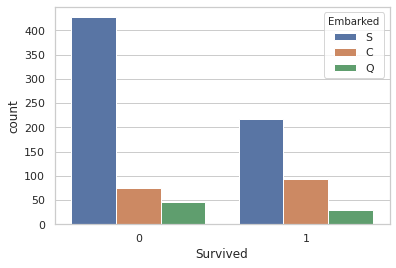

In [14]:
print(train_data.groupby(['Embarked','Survived'])['Survived'].count())
sns.set(style="whitegrid")
sns.countplot(train_data['Survived'],hue = 'Embarked',data = train_data)
plt.show()

> Feature engineering on Name,Age,SibSp + Parch and Fare features. 

In [15]:
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(pd.crosstab(train_data['Title'], train_data['Sex']))
print('-' * 50)
print(pd.crosstab(test_data['Title'], test_data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
--------------------------------------------------
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [16]:
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print(train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [17]:
for dataset in combined:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_data['CategoricalAge'] = pd.cut(train_data['Age'], 5)

print (train_data[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.522523
1   (16.0, 32.0]  0.359375
2   (32.0, 48.0]  0.365079
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [18]:
for dataset in combined:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_data[['FamilySize','Survived']].groupby('FamilySize',as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [19]:
for dataset in combined:
    dataset['FamilySizeCategory'] = 0
    for i in range(len(dataset)) : 
        if(dataset.loc[i,'FamilySize'] <= 4):
            dataset.loc[i,'FamilySizeCategory'] = 2
        elif((dataset.loc[i,'FamilySize'] > 4) & (dataset.loc[i,'FamilySize'] < 8)):
            dataset.loc[i,'FamilySizeCategory'] = 1
        else:
            dataset.loc[i,'FamilySizeCategory'] = 0           
    
print (train_data[['FamilySizeCategory', 'Survived']].groupby(['FamilySizeCategory'], as_index=False).mean())
train_data['FamilySizeCategory'].nunique()

   FamilySizeCategory  Survived
0                   0  0.000000
1                   1  0.204082
2                   2  0.400483


3

In [20]:
for dataset in combined:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [21]:
for dataset in combined:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())
train_data['CategoricalFare'] = pd.qcut(train_data['Fare'], 4)
print (train_data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [22]:
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data[['Embarked','Survived']].groupby(['Embarked'],as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Survived            891 non-null    int64   
 1   Pclass              891 non-null    int64   
 2   Name                891 non-null    object  
 3   Sex                 891 non-null    object  
 4   Age                 891 non-null    int64   
 5   SibSp               891 non-null    int64   
 6   Parch               891 non-null    int64   
 7   Fare                891 non-null    float64 
 8   Embarked            891 non-null    object  
 9   Title               891 non-null    object  
 10  CategoricalAge      891 non-null    category
 11  FamilySize          891 non-null    int64   
 12  FamilySizeCategory  891 non-null    int64   
 13  IsAlone             891 non-null    int64   
 14  CategoricalFare     891 non-null    category
dtypes: category(2), float64(1), int64(8), ob

In [24]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'female' : 0,'male' : 1} )
    
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 80),'Age'] = 4

    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    drop_columns = ['Name','SibSp','Parch','FamilySize']
    dataset.drop(drop_columns,axis = 1,inplace = True)

drop_col = ['CategoricalAge','CategoricalFare']
train_data.drop(drop_col,axis = 1,inplace = True)

In [25]:
train_data.FamilySizeCategory.nunique()

3

In [26]:
train_data = pd.get_dummies(train_data, prefix = ['Title'], columns = ['Title'])
test_data = pd.get_dummies(test_data, prefix = ['Title'], columns = ['Title'])

In [27]:
train_data.FamilySizeCategory.nunique()

3

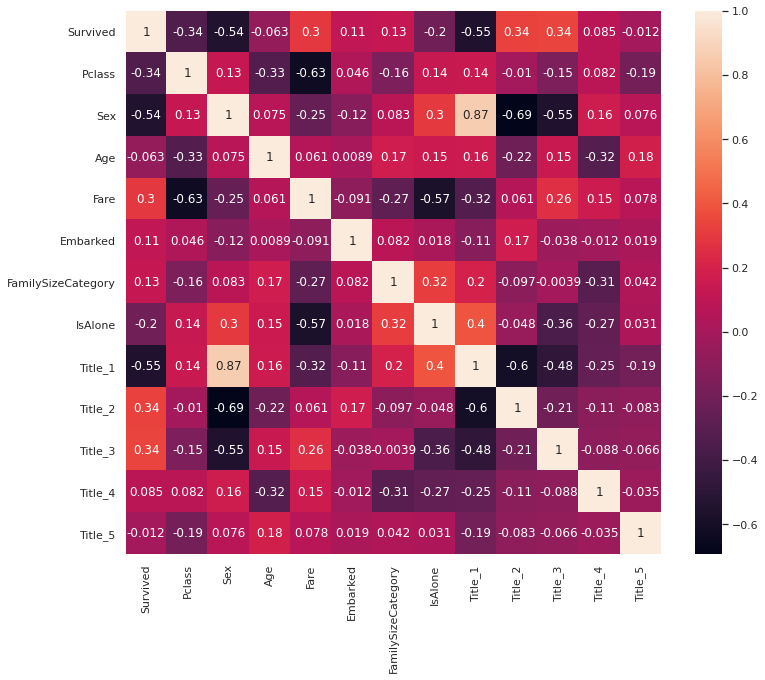

In [28]:
plt.figure(figsize = (12,10))
sns.heatmap(train_data.corr(),annot=True,cbar = True)
plt.show()

In [29]:
x_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
x_test = test_data
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Prediction Using Ensembling Methods

> Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways, which you will discover in this notebook.

1. ## Simple Techniques

### 1. Max Voting

> The Max Voting method is generally used for classication problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.<br><br>
For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.


In [30]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
model4 = GaussianNB()
model5 = LinearSVC()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)


y1 = model1.predict(x_test)
y2 = model2.predict(x_test)
y3 = model3.predict(x_test)
y4 = model4.predict(x_test)
y5 = model5.predict(x_test)


y = np.zeros(len(x_test))
for i in range(0,len(x_test)):
    count = y1[i] + y2[i] + y3[i] + y4[i] + y5[i]
    y[i] = (count // 3)
y = y.astype(int)

In [31]:
submit = pd.DataFrame(y,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('maxvoting1.csv')

#### Another way to implement Max Voting:

In [32]:
model = VotingClassifier(estimators=[('dtree', model1), ('knn', model2), ('lr', model3),('gnb',model4),('svc',model5)], voting='hard')
model.fit(x_train,y_train)


VotingClassifier(estimators=[('dtree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('gnb', GaussianNB()), ('svc', LinearSVC())])

In [33]:
y2 = model.predict(x_test)

In [34]:
submit = pd.DataFrame(y2,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('maxvoting2.csv')

> Both the implementation methods gave 0.7751 as public score.

### 2. Averaging 

> Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classication problems.

### 3.Weighted Averaging

> This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.


> We can assign weights to the models by looking at the data, and then calculate the mean of the predicted values.

In [35]:
y3 = np.zeros(len(x_test))
for i in range(0,len(x_test)):
    count = 0.5 * y1[i] + 0.5 + y2[i] + 2 * y3[i] + y4[i] + 2 * y5[i]
    y3[i] = (count // 3)
y3 = y3.astype(int)

In [36]:
submit = pd.DataFrame(y3,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('weighted_averaging.csv')

## 2. Advanced techniques

### 1.Stacking


> Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

#### a). Implementing stacking from scratch

In [37]:
def predictor(model,x,y,x_test):
    pred_train = cross_val_predict(model,x,y,cv = 4)   
    
    model.fit(x,y)
    pred_test = model.predict(x_test)
    
    return pred_train,pred_test

M1_pred,M1_pred_test = predictor(model1,x_train,y_train,x_test)
M2_pred,M2_pred_test = predictor(model2,x_train,y_train,x_test)
M3_pred,M3_pred_test = predictor(model3,x_train,y_train,x_test)

stacked_x_train = {
    'DT': M1_pred,
    'KNN': M2_pred,
    'LR': M3_pred
}
stacked_x_train = pd.DataFrame(stacked_x_train) 
stacked_x_train

,DT,KNN,LR
0,0,0,0
1,1,1,1
2,0,0,1
3,1,1,1
4,0,0,0
...,...,...,...
886,0,0,0
887,1,1,1
888,0,0,1
889,0,0,0


In [38]:
stacked_x_test = {
    'DT': M1_pred_test,
    'KNN': M2_pred_test,
    'LR': M3_pred_test
}
stacked_x_test = pd.DataFrame(stacked_x_test) 
stacked_x_test

,DT,KNN,LR
0,0,0,0
1,0,1,1
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
413,0,0,0
414,1,1,1
415,0,0,0
416,0,0,0


> Using decision tree,knn and logistic regression as our base models and SVC as our meta-model.

In [39]:
model5.fit(stacked_x_train,y_train)
y4 = model5.predict(stacked_x_test)

submit = pd.DataFrame(y4,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('stacking_from_scratch.csv')

> We achieved score of 0.76794 by using the above technique.[](http://) 

#### b.) Implementing stacking using SkLearn's StackingClassifier

In [40]:
estimators = [
    ('dt',model1),
    ('knn',model2),
    ('lr',model3)
]

clf = StackingClassifier(estimators = estimators, final_estimator = model5,cv = 10)
clf.fit(x_train, y_train)

y5 = clf.predict(x_test)
submit = pd.DataFrame(y5,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('stacking.csv')

 > We achieved score of 0.78229 by using the above technique, which is the best score yet!!!!!

### 2. Blending

> Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set.

In [41]:
base_x_train,x_val,base_y_train,y_val = train_test_split(x_train,y_train,random_state = 42,train_size = 0.8)

def blending_predictor(model,x,y,x_val):
    model.fit(x,y)
    val_pred = model.predict(x_val)
    test_pred = model.predict(x_test)
    
    return val_pred,test_pred

M1_val_pred,M1_test_pred = blending_predictor(model1,base_x_train,base_y_train,x_val)
M2_val_pred,M2_test_pred = blending_predictor(model2,base_x_train,base_y_train,x_val)
M3_val_pred,M3_test_pred = blending_predictor(model3,base_x_train,base_y_train,x_val)


In [42]:
M1_val_pred = pd.DataFrame(M1_val_pred)
M2_val_pred = pd.DataFrame(M2_val_pred)
M3_val_pred = pd.DataFrame(M3_val_pred)


M1_test_pred = pd.DataFrame(M1_test_pred)
M2_test_pred = pd.DataFrame(M2_test_pred)
M3_test_pred = pd.DataFrame(M3_test_pred)


In [43]:
x_val.index = range(179)
df_val = pd.concat([x_val, M1_val_pred,M2_val_pred,M3_val_pred],axis=1,ignore_index = True)
df_test = pd.concat([x_test, M1_test_pred,M2_test_pred,M3_test_pred],axis=1)

model5.fit(df_val,y_val)
y6 = model5.predict(df_test)

submit = pd.DataFrame(y6,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('blending.csv')

> Score received: 0.76076

### 3.EL models based on Bagging and Boosting:

### 1. Bagging:

#### What is Bagging?

> The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. <br>
Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the
same result since they are getting the same input. <br><br>
So how can we solve this problem? One of the techniques is bootstrapping.
<br>
Bootstrapping is a sampling technique in which we create subsets of observations from the
original dataset, with replacement. The size of the subsets is the same as the size of the original set.
Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

#### Procedure to follow:
1. Multiple subsets are created from the original dataset, selecting observations with
replacement.
2. A base model (weak model) is created on each of these subsets.
3. The models run in parallel and are independent of each other.
4. The final predictions are determined by combining the predictions from all the models.

#### a) Bagging Meta-Estimator

> Bagging meta-estimator is an ensembling algorithm that can be used for both classication (BaggingClassier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions.<br><br>
Following are the steps for the bagging meta-estimator algorithm:
1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specied base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

> For tuning the hyper parameters of decision tree and other based models used, refer [here](https://www.kaggle.com/tug004/surviving-titanic-the-right-way).

In [44]:
param_grid = {
    'n_estimators': list(range(20))
}
gscv = GridSearchCV(BaggingClassifier(random_state = 0),param_grid = param_grid, cv = 10)
gscv.fit(x_train,y_train)
gscv.best_params_

{'n_estimators': 13}

In [45]:
gscv.best_estimator_

BaggingClassifier(n_estimators=13, random_state=0)

In [46]:
clf = BaggingClassifier(model1,n_estimators = 19,random_state = 0)
clf.fit(x_train,y_train)

y7 = clf.predict(x_test)

submit = pd.DataFrame(y7,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('bagging.csv')

> We achieved score of 0.77511 by using the above technique.

#### b) Random Forests<br>
> Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!<br><br>
> Random forest is like bootstrapping algorithm with Decision tree (CART) model. Say, we have 1000 observation in the complete population with 10 variables. Random forest tries to build multiple CART models with different samples and different initial variables. For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model. It will repeat the process (say) 10 times and then make a final prediction on each observation. Final prediction is a function of each prediction. This final prediction can simply be the mean of each prediction.

In [47]:
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25], 
    'max_depth': [3, 5, 7, 9, 11, 13],    
    'criterion': ['gini', 'entropy']
}
gscv = GridSearchCV(RandomForestClassifier(random_state = 0),param_grid = param_grid, cv = 10,scoring = 'accuracy')
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}

In [48]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20,
                       random_state=0)

In [49]:
clf = RandomForestClassifier(n_estimators = 20,max_depth = 5,criterion = 'gini',random_state = 0)
clf.fit(x_train,y_train)

y8 = clf.predict(x_test)

submit = pd.DataFrame(y8,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('random_forest.csv')

> We achieved score of 0.77990 by using the above technique.

In [50]:
clf.feature_importances_

array([0.15201777, 0.21349441, 0.02568767, 0.05102753, 0.02595096,
       0.08159396, 0.01384946, 0.31520854, 0.05838478, 0.03026976,
       0.01578348, 0.01673168])

### 2. Boosting

> Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.<br> <br>
Let’s understand the way boosting works in detail:
1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset.
5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.
7. Another model is created and predictions are made on the dataset.
8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners).
10. Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

#### a). Gradient Boosting Machine (GBM)

In [51]:
param_grid = {
    'loss': ['deviance','exponential'],
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
    
}
gscv = GridSearchCV(GradientBoostingClassifier(random_state = 0),param_grid = param_grid, cv = 10)
gscv.fit(x_train,y_train)
gscv.best_params_

{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 25}

In [52]:
clf = GradientBoostingClassifier(
    loss = 'exponential',
    learning_rate = 0.1,
    n_estimators = 50 ,
    criterion = 'mae',
    min_samples_split = 10,
    min_samples_leaf = 3,
    max_depth = 6,
    max_features = 'sqrt',
    random_state = 0)

clf.fit(x_train,y_train)

y9 = clf.predict(x_test)

submit = pd.DataFrame(y9,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('gradientboosting.csv')

#### b). Xtreme Gradient Boosting Machine (XGBM)

In [53]:
param_grid = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}
gscv = GridSearchCV(XGBClassifier(random_state = 0),param_grid = param_grid, cv = 10,scoring = 'accuracy')
gscv.fit(x_train,y_train)
gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

In [54]:
gscv.best_score_

0.8338951310861422

In [55]:
clf = XGBClassifier(learning_rate = 0.05, max_depth = 7, n_estimators = 100,random_state = 42)

clf.fit(x_train,y_train)

y10 = clf.predict(x_test)

submit = pd.DataFrame(y10,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('xgboosting.csv')

#### c). Adaptive Boosting (AdaBoost)

In [56]:
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 75, 100], 
    'learning_rate': [0.001, 0.01, 0.1, 1.],
}
gscv = GridSearchCV(AdaBoostClassifier(random_state = 0),param_grid = param_grid, cv = 10,scoring = 'accuracy')
gscv.fit(x_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)

0.8294132334581773
{'learning_rate': 0.1, 'n_estimators': 75}


In [57]:
clf = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 75,random_state = 42)

clf.fit(x_train,y_train)

y11 = clf.predict(x_test)

submit = pd.DataFrame(y11,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('adaboost.csv')

> We achieved score of 0.77990 by using the above technique.

#### d.) LightGBM

> Before discussing how Light GBM works, let’s first understand why we need this algorithm when we have so many others (like the ones we have seen above). Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.
<br><br>
LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leafwise approach while other algorithms work in a level-wise approach pattern. <br>



In [58]:
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
    'max_depth': [3,5,7,9,13]
}
gscv = GridSearchCV(LGBMClassifier(random_state = 0),param_grid = param_grid, cv = 10,scoring = 'accuracy')
gscv.fit(x_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)

0.8350187265917602
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15, 'num_leaves': 7}


In [59]:
clf = LGBMClassifier(learning_rate = 0.05, n_estimators = 50,max_depth = 5,num_leaves = 15,random_state = 42)

clf.fit(x_train,y_train)
y12 = clf.predict(x_test)

submit = pd.DataFrame(y12,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('lgbm.csv')

#### e.) CatBoost

> Handling categorical variables is a tedious process, especially when you have a large number of such variables. When your categorical variables have too many labels (i.e. they are highly cardinal), performing one-hot-encoding on them exponentially increases the dimensionality and it becomes really difcult to work with the dataset.<br><br>
CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms.

In [60]:
param_grid = {
    'iterations': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7, 9, 11, 13],
}
gscv = GridSearchCV(CatBoostClassifier(random_state = 0,verbose = False),param_grid = param_grid, cv = 10,scoring = 'accuracy')
gscv.fit(x_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)

0.8350187265917602
{'depth': 5, 'iterations': 10, 'learning_rate': 0.1}


In [61]:
clf = CatBoostClassifier(learning_rate = 0.1,depth = 5,iterations = 10,random_state = 42)

clf.fit(x_train,y_train)

y13 = clf.predict(x_test)

submit = pd.DataFrame(y13,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('catboost.csv')

0:	learn: 0.6536019	total: 662us	remaining: 5.96ms
1:	learn: 0.6191447	total: 1.63ms	remaining: 6.51ms
2:	learn: 0.5920434	total: 2.35ms	remaining: 5.48ms
3:	learn: 0.5681246	total: 2.95ms	remaining: 4.43ms
4:	learn: 0.5466532	total: 3.57ms	remaining: 3.57ms
5:	learn: 0.5284692	total: 4.15ms	remaining: 2.76ms
6:	learn: 0.5148503	total: 4.73ms	remaining: 2.03ms
7:	learn: 0.5009728	total: 5.29ms	remaining: 1.32ms
8:	learn: 0.4897600	total: 5.79ms	remaining: 643us
9:	learn: 0.4785859	total: 6.39ms	remaining: 0us


 > Thanks for going through the notebook. Do comment in case you have any doubts/suggestions.<br>
